# Efficient-CapsNet Model Test

In this notebook we provide a simple interface to test the different trained Efficient-CapsNet models on the three datasets:

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages
from models import EfficientCapsNet

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [4]:
# some parameters
model_name = 'MNIST' 
custom_path = None # if you've trained a new model, insert here the full graph weights path

# 1.0 Import the Dataset

In [5]:
dataset = Dataset(model_name, config_path='config.json')

(378, 128, 128)
(378,)
(50, 128, 128)
(50,)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0.]
[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

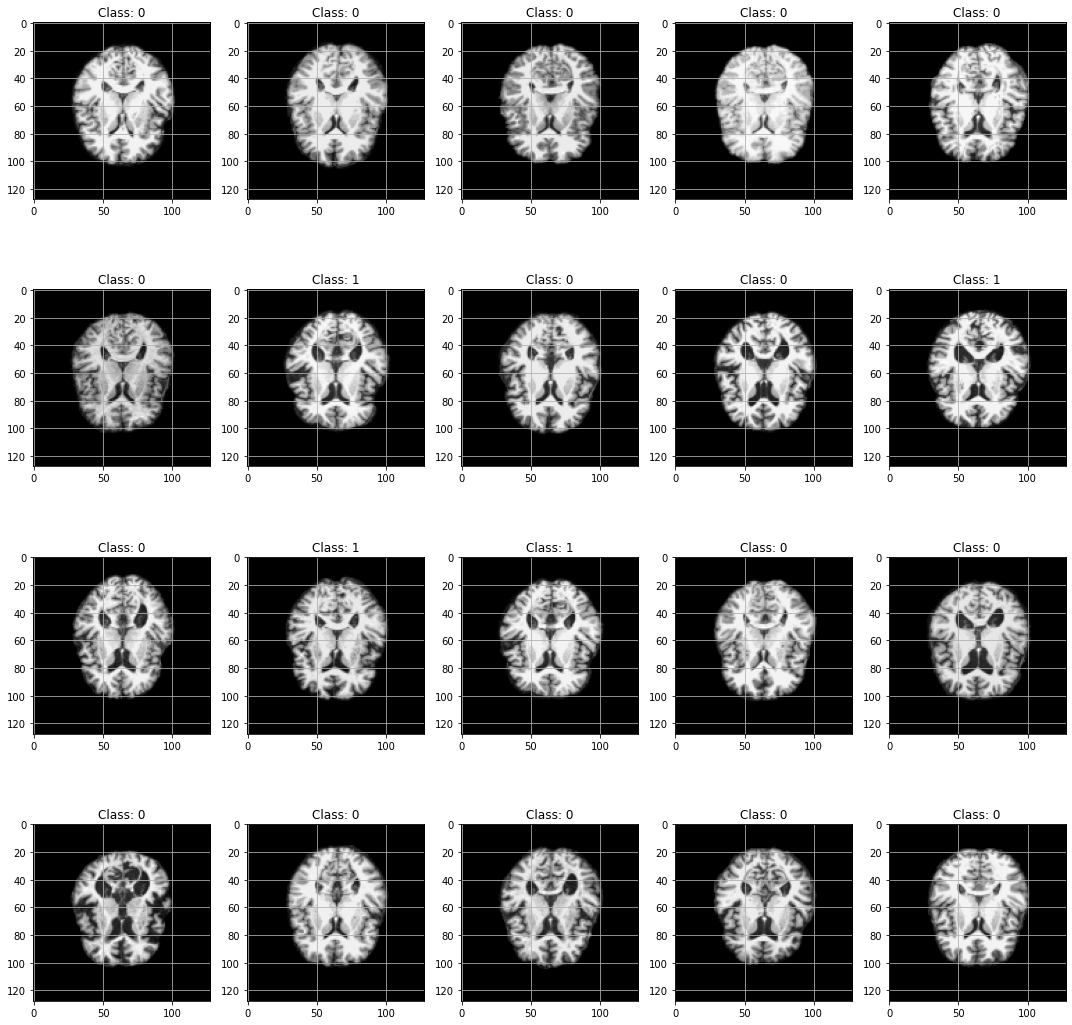

In [6]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [7]:
model_test = EfficientCapsNet(model_name, mode='test', verbose=True, custom_path=custom_path)

model_test.load_graph_weights() # load graph weights (bin folder)

[128, 128, 1]
Model: "Efficient_CapsNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
batch_normalization (BatchNo (None, 124, 124, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 122, 122, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None,

# 3.0 Test the Model

In [10]:
model_test.evaluate(dataset.X_test, dataset.y_test) # if "smallnorb" use X_test_patch

------------------------------MNIST Evaluation------------------------------
Test acc: 0.24
Test error [%]: 76.0000%
N° misclassified images: 38 out of 50


## 3.1 Plot misclassified images

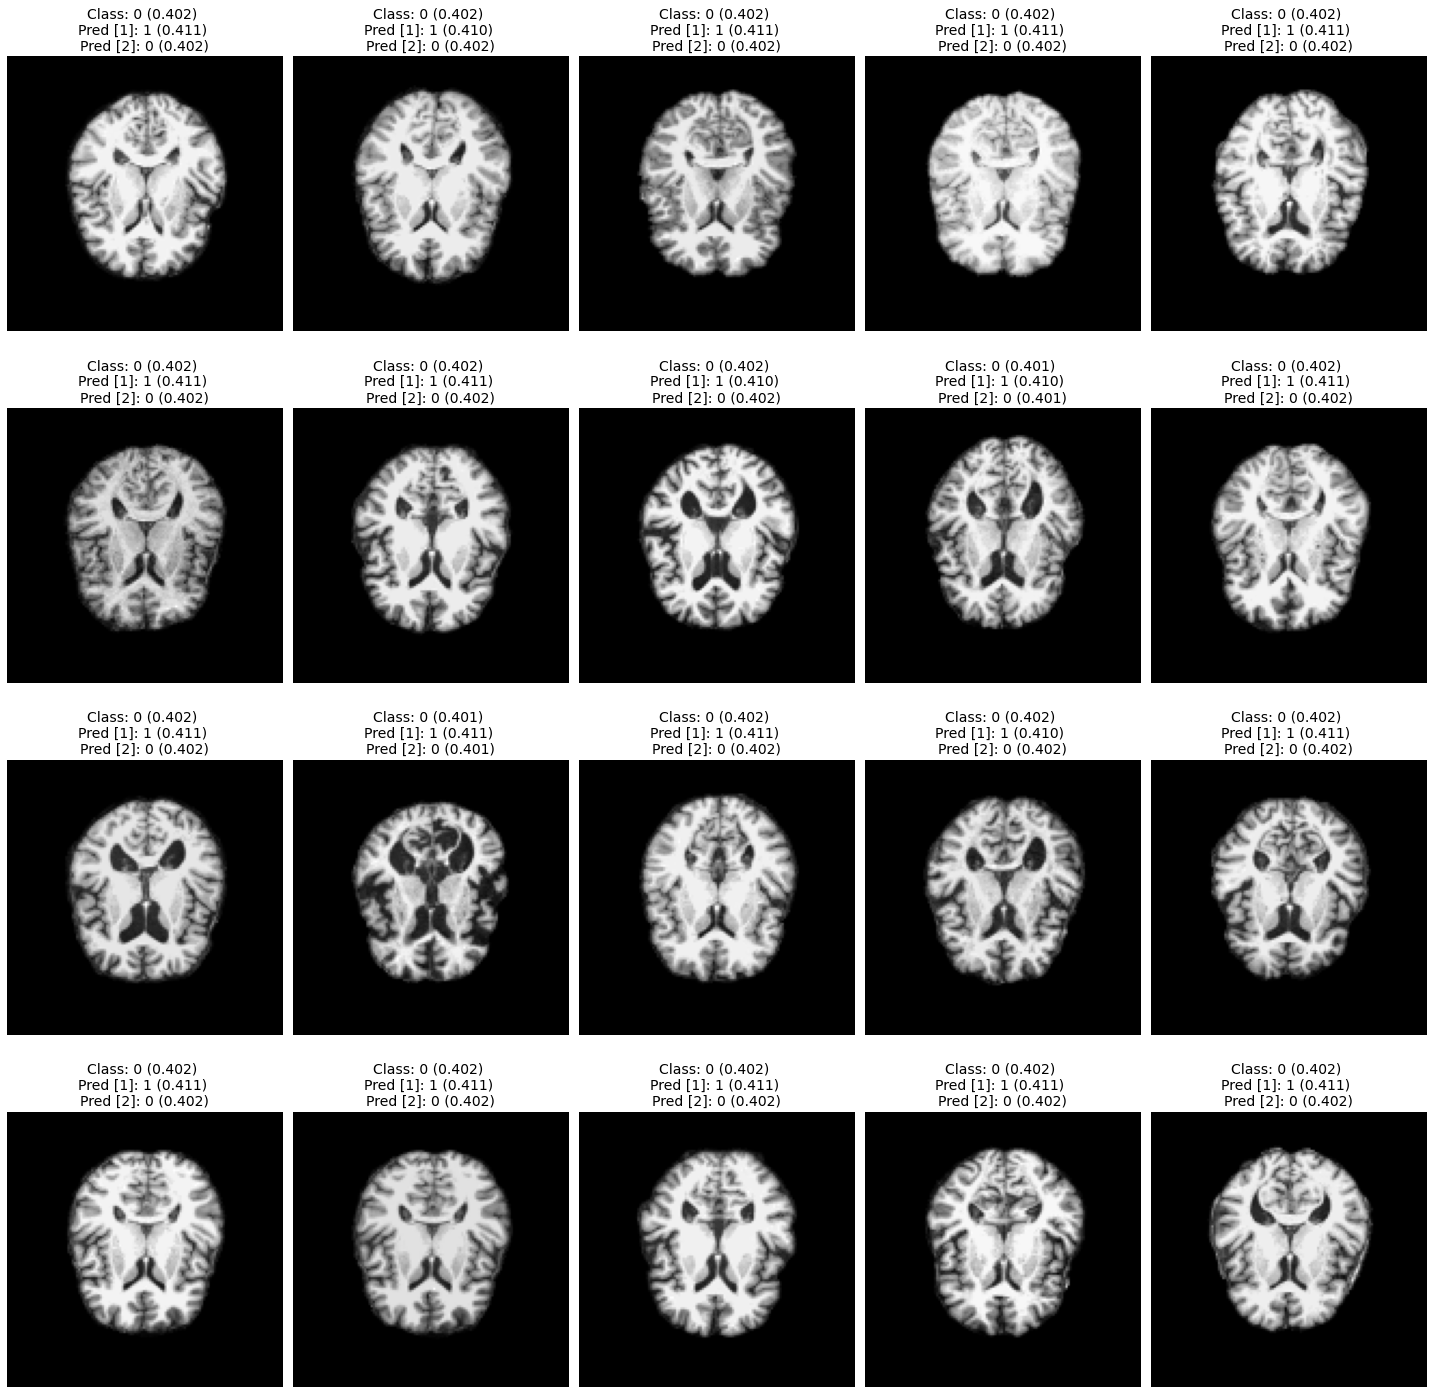

In [11]:
#not working with MultiMNIST
y_pred = model_test.predict(dataset.X_test)[0] # if "smallnorb" use X_test_patch

n_images = 20
plotWrongImages(dataset.X_test, dataset.y_test, y_pred, # if "smallnorb" use X_test_patch
                n_images, dataset.class_names)